In [57]:
import pandas as pd
import math
import random
import time
import pylab as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df = pd.DataFrame(columns=['x1','x2','t'])
df.loc[0] = [1,-1,-1]
df.loc[1] = [2,1,1]
df.loc[2] = [1.5,.5,-1]
df.loc[3] = [2,-1,-1]
df.loc[4] = [1,2,1]
df['bias'] = 1

In [3]:
class Perceptron:
    
    def __init__(self, w=[1,1,1]):
        self.w = w
    
    def activate(self,x1,x2,bias):
        if x1*self.w[0] + x2*self.w[1] + bias*self.w[2] > 0:
            return 1
        else:
            return -1
    
    def train_perceptron(self,df,n=0.1):
        self.w[0] = random.randint(-10,10)
        self.w[1] = random.randint(-10,10)
        while df.apply(lambda x: self.activate(x['x1'],x['x2'],x['bias'])!=x['t'],axis=1).sum() != 0:
            for i in range(df.shape[0]):
                xw = df.loc[i]['x1']*self.w[0] + df.loc[i]['x2']*self.w[1] + df.loc[i]['bias']*self.w[2]
                error = df.loc[i][2] - math.copysign(1,xw-0.0000000001)
                self.w[0] = self.w[0] + n*error*df.loc[i]['x1']
                self.w[1] = self.w[1] + n*error*df.loc[i]['x2']
                self.w[2] = self.w[2] + n*error*df.loc[i]['bias']
#            print self.w

In [7]:
p = Perceptron()

In [8]:
p.activate(1,2,3)

1

In [15]:
p.train_perceptron(df)

In [16]:
p.w

[0.80000000000000004, 0.80000000000000104, -1.9999999999999993]

In [17]:
df.apply(lambda x: p.activate(x['x1'],x['x2'],x['bias'])==x['t'],axis=1)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [18]:
df2 = pd.DataFrame(columns=['x1','x2','t','bias'])
for i in range(20):
    df2.loc[i] = [random.randint(-5,5),random.randint(-5,5),0,1]
df2['t'] = 2*((df2['x2'] - 1.2*df2['x1']) >= 0).astype(int) - 1

In [19]:
p2 = Perceptron()

In [20]:
p2.train_perceptron(df=df2)

In [130]:
#df2.apply(lambda x: p2.activate(x['x1'],x['x2'],x['bias'])==x['t'],axis=1)

In [29]:
for i in range(20):
    start = time.time()
    p2.train_perceptron(df=df2,n = float(i)/100 + 0.01)
    print time.time() - start

1.25072407722
0.361785888672
0.322104930878
0.285783052444
0.244760036469
0.319604158401
0.15947508812
0.163478136063
0.119740009308
0.0790212154388
0.0793650150299
0.0444610118866
0.0743210315704
0.00261878967285
0.0435259342194
0.0413999557495
0.0449230670929
0.038153886795
0.0774660110474
0.0776858329773


In [30]:
#When the learning rate is very small, it takes longer for the algorithm to converge

In [148]:
#It produces different values of w each time, and training time varies randomly depending on the initialization of w.
#However, it always converges.

In [31]:
#x1 = -w[2] - x2*w[1] / w[0]

In [32]:
(-p2.w[2] - (-6)*p2.w[1]) / p2.w[0]

-6.7333333333333298

In [33]:
(-p2.w[2] - (6)*p2.w[1]) / p2.w[0]

7.5523809523809522

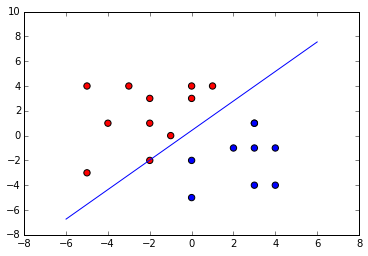

In [34]:
plt.scatter(df2['x1'],df2['x2'],c=df2.t.map({1:'r',-1:'b'}),s=40)
plt.plot([-6,6],[-6.7333333333333298,7.5523809523809522])

In [35]:
#2

In [97]:
class Perceptron:
    
    def __init__(self, w=[1,1,1]):
        self.w = w
    
    def activate(self,x1,x2,bias):
        if x1*self.w[0] + x2*self.w[1] + bias*self.w[2] > 0:
            return 1
        else:
            return -1
    
    def train_perceptron(self,df,n=0.1):
        self.w[0] = random.randint(-10,10)
        self.w[1] = random.randint(-10,10)
        self.w[2] = random.randint(-10,10)
        while df.apply(lambda x: self.activate(x['x1'],x['x2'],x['bias'])!=x['t'],axis=1).sum() != 0:
            for i in range(df.shape[0]):
                xw = df.loc[i]['x1']*self.w[0] + df.loc[i]['x2']*self.w[1] + df.loc[i]['bias']*self.w[2]
                error = df.loc[i][2] - math.copysign(1,xw-0.0000000001)
                self.w[0] = self.w[0] + n*error*df.loc[i]['x1']
                self.w[1] = self.w[1] + n*error*df.loc[i]['x2']
                self.w[2] = self.w[2] + n*error*df.loc[i]['bias']
#            print self.w

    def batch_mode(self,df,n=0.1):
        self.w[0] = random.randint(-10,10)
        self.w[1] = random.randint(-10,10)
        self.w[2] = random.randint(-10,10)
        while df.apply(lambda x: self.activate(x['x1'],x['x2'],x['bias'])!=x['t'],axis=1).sum() != 0:
            X = np.matrix(df[['x1','x2','bias']])
            Xw = X*np.matrix(self.w).T
            delta = 0.1*X.T*(np.matrix(df['t']).T - Xw)
            self.w[0] += np.array(delta)[0][0]
            self.w[1] += np.array(delta)[1][0]
            self.w[2] += np.array(delta)[2][0]
            print self.w

In [98]:
p3 = Perceptron()
p3.batch_mode(df=df,n=0.1)

[-3.3500000000000014, -1.1500000000000001, -2.2000000000000002]
[2.455000000000001, 1.0500000000000005, 1.4850000000000012]
[-1.9998750000000021, 0.086374999999999758, -1.3562500000000006]
[1.3020437500000011, 1.0271687500000004, 0.70882500000000137]
[-1.1543331250000017, 0.3982899999999997, -0.87619562500000026]
[0.69717092187500063, 0.89296739062500019, 0.26790853125000114]
[-0.66406414921875134, 0.53337484140624969, -0.62286903437500007]
[0.37322561210937555, 0.8063196626562501, 0.0066073685156260442]
[-0.38003723007617285, 0.60543231983398416, -0.49756347422265623]
[0.2027303264631839, 0.75763492435107427, -0.15456866252929602]
[-0.21227393831868235, 0.64605709644488263, -0.44297731476469704]
[0.11693463031737195, 0.73126023794281669, -0.25919176811006911]
[-0.10988700737884979, 0.66951177034524489, -0.42698589248448604]


In [143]:
df3 = pd.DataFrame(columns=['x1','x2','t','bias'])
for i in range(40):
    df3.loc[i] = [random.randint(-5,5),random.randint(-5,5),0,1]
df3['t'] = [2*random.randint(0,2) - 1 for x in range(40)]

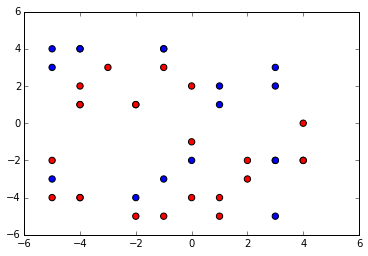

In [144]:
plt.scatter(df3['x1'],df3['x2'],c=df3.t.map({1:'r',-1:'b'}),s=40)
#plt.plot([-6,6],[-6.7333333333333298,7.5523809523809522])

In [145]:
p4 = Perceptron()
p4.batch_mode(df=df3,n=0.1)

[185.40000000000003, -365.89999999999998, 10.699999999999998]
[-8430.6200000000008, 14778.840000000002, -242.70999999999987]
[375302.46200000012, -601146.54500000016, 6055.9540000000079]
[-16450861.496800007, 24598831.26730001, -124775.94469999954]
[713171338.85522032, -1011546828.1881205, 1018711.2597699942]
[-30668763622.778736, 41763190247.432297, 95168714.095761374]
[1310996129960.9907, -1729816087727.9016, -8503964890.0407133]
[-55790090606307.133, 71833252029449.828, 504321734763.9173]
[2366115583587876.0, -2989112746836469.0, -25982793598000.832]
[-1.0008946680892938e+17, 1.2458496748104859e+17, 1247782047268902.2]
[4.2254890013529907e+18, -5.1993298095058842e+18, -57502108085754872.0]
[-1.7811499210209811e+20, 2.1720469213817016e+20, 2.5807103669939005e+18]
[7.4991196516069472e+21, -9.0810741602826353e+21, -1.1376231233032408e+20]
[-3.1544407921945133e+23, 3.799068316840655e+23, 4.9518231838045325e+21]
[1.3259464658652589e+25, -1.5901211307756698e+25, -2.1357962602419765e+23]
[

KeyboardInterrupt: 

In [146]:
#If data is not linearly separable, w does not converge

In [147]:
#Maybe a better criterion would be, terminate if the fraction of predictions
#which are correct stops increasing